In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
customer = pd.read_csv('CUSTOMERS.csv')

In [3]:
seller = pd.read_csv('SELLERS.csv')

In [4]:
product = pd.read_csv('PRODUCTS.csv')

In [5]:
order = pd.read_csv('ORDERS.csv')

In [6]:
geo_location = pd.read_csv('GEO_LOCATION.csv')

In [7]:
order_item = pd.read_csv('ORDER_ITEMS.csv')

In [8]:
order_payment = pd.read_csv('ORDER_PAYMENTS.csv')

In [9]:
order_review_rating = pd.read_csv('ORDER_REVIEW_RATINGS.csv')

In [10]:
customer.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh


In [11]:
seller.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh


In [12]:
order.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00


In [13]:
product.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [14]:
geo_location.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh


In [15]:
order_item.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29


In [16]:
order_payment.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [17]:
order_review_rating.head(1)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46


In [18]:
cust_ord = pd.merge(left = customer, right = order , on ='customer_id', how = 'left')

In [19]:
cust_ord_rev = pd.merge(left = order_review_rating , right = cust_ord, on = 'order_id', how = 'left')

In [20]:
cust_ord_rev_pay = pd.merge (left = cust_ord_rev, right = order_payment, on = 'order_id', how = 'left')

In [21]:
cust_ord_rev_pay_item = pd.merge(left = cust_ord_rev_pay, right = order_item, on = 'order_id', how = 'left')

In [22]:
cust_ord_rev_pay_item_prod = pd.merge(left = cust_ord_rev_pay_item, right = product, on= 'product_id', how = 'left')	

In [23]:
cust_ord_rev_pay_item_prod_sell = pd.merge(left = cust_ord_rev_pay_item_prod, right = seller, on = 'seller_id', how = 'left')

In [24]:
df = pd.merge(left=cust_ord_rev_pay_item_prod_sell, right = geo_location, left_on = 'customer_zip_code_prefix',
              right_on = 'geolocation_zip_code_prefix', how = 'left')

In [25]:
df.head(1)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8,6030,Nagari,Andhra Pradesh,...,30.0,35.0,14600.0,Kandukur,Andhra Pradesh,6030.0,-23.561963,-46.765487,Nagari,Andhra Pradesh


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119151 entries, 0 to 119150
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      119151 non-null  object 
 1   order_id                       119151 non-null  object 
 2   review_score                   119151 non-null  int64  
 3   review_creation_date           119151 non-null  object 
 4   review_answer_timestamp        119151 non-null  object 
 5   customer_id                    119151 non-null  object 
 6   customer_unique_id             119151 non-null  object 
 7   customer_zip_code_prefix       119151 non-null  int64  
 8   customer_city                  119151 non-null  object 
 9   customer_state                 119151 non-null  object 
 10  order_status                   119151 non-null  object 
 11  order_purchase_timestamp       119151 non-null  object 
 12  order_approved_at             

In [27]:
df.shape

(119151, 42)

In [28]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [29]:
df.drop(columns = ['geolocation_zip_code_prefix', 'seller_zip_code_prefix', 'product_name_lenght', 'product_description_lenght',
        'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_delivered_carrier_date', 
        'payment_sequential'], inplace = True)

In [30]:
df.shape

(119151, 32)

In [31]:
df.duplicated().sum()

709

In [32]:
df.drop_duplicates(inplace= True)

In [33]:
df.shape

(118442, 32)

In [34]:
df.order_purchase_timestamp=pd.to_datetime(df.order_purchase_timestamp)
df.review_creation_date=pd.to_datetime(df.review_creation_date)

In [35]:
df.dtypes 

review_id                                object
order_id                                 object
review_score                              int64
review_creation_date             datetime64[ns]
review_answer_timestamp                  object
customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_customer_date            object
order_estimated_delivery_date            object
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_item_id                           float64
product_id                               object
seller_id                               

##a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations,
Total channels, Total payment methods etc…) 

In [36]:
print("Total Revenue =",df.payment_value.sum())
print("Total Quantity =",df.order_item_id.count())
print("Total products are",df.product_id.nunique())
print("Total product categories =",df.product_category_name.nunique())
print("Total number of sellers =",df.seller_id.nunique())
print("Total locations =",df.customer_zip_code_prefix.nunique())
print("Total channels =", df.review_id.count()) 
print("payment methods =",df.payment_type.nunique())

Total Revenue = 20558165.900000002
Total Quantity = 117628
Total products are 32951
Total product categories = 71
Total number of sellers = 3095
Total locations = 14994
Total channels = 118442
payment methods = 5


##b. Understanding how many new customers acquired every month 

In [37]:
df['month_of_year']=df['order_purchase_timestamp'].apply(lambda x : pd.Timestamp.strftime(x,format='%Y-%m'))
new_customer_monthly=df.drop_duplicates(subset = ['customer_unique_id'],keep = 'first').groupby(by='month_of_year')['customer_unique_id'].nunique().reset_index()
new_customer_monthly

,month_of_year,customer_unique_id
0,2016-09,4
1,2016-10,316
2,2016-12,1
3,2017-01,752
4,2017-02,1720
5,2017-03,2594
6,2017-04,2316
7,2017-05,3532
8,2017-06,3103
9,2017-07,3866


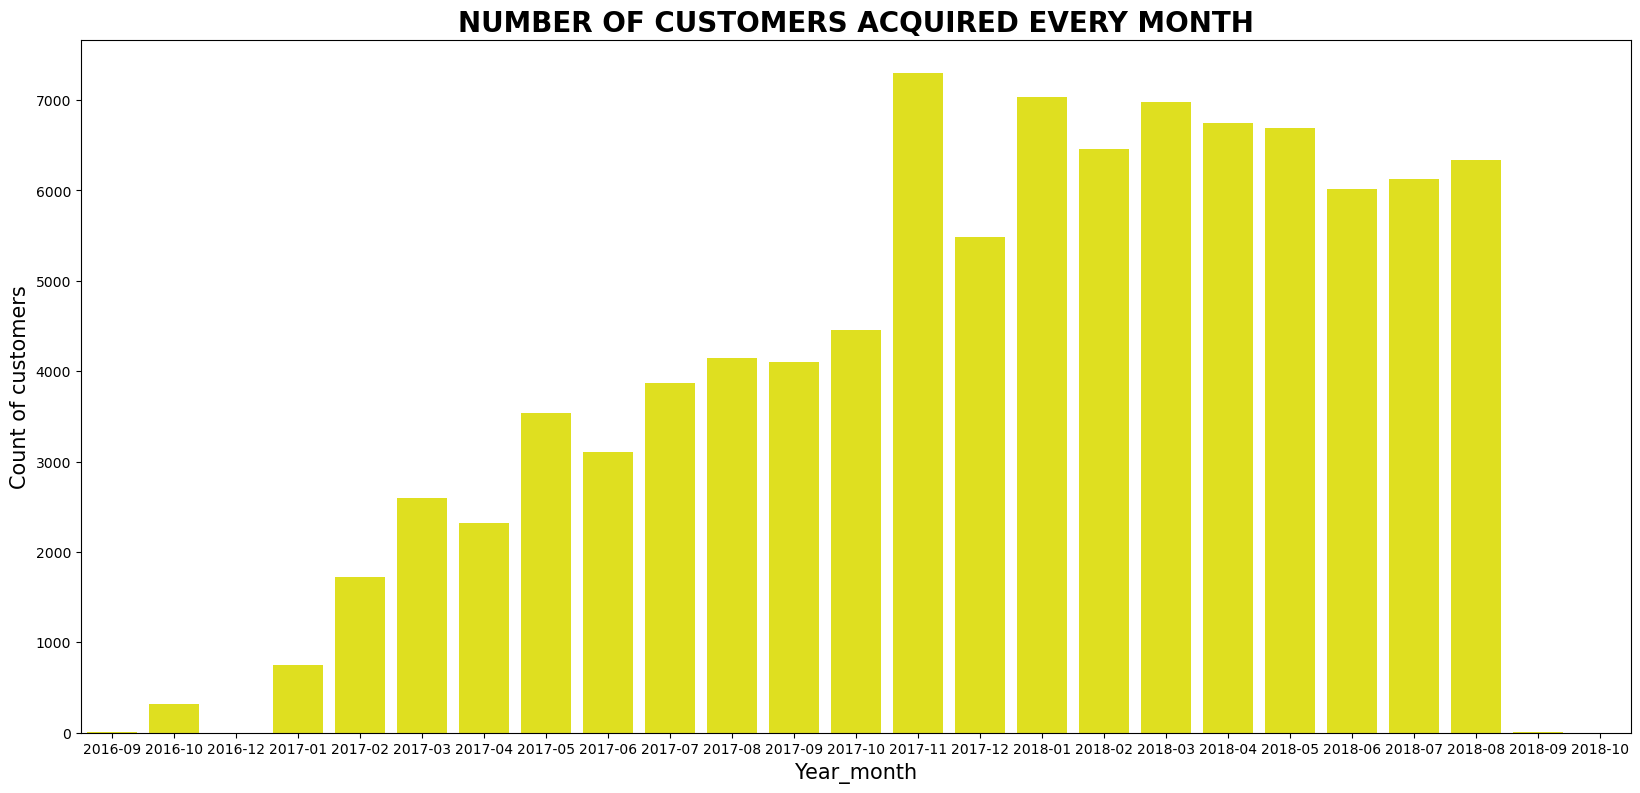

In [38]:
plt.figure(figsize=(20,9))
fig=sns.barplot(data=new_customer_monthly, x='month_of_year', y='customer_unique_id', color='yellow' )
plt.title('NUMBER OF CUSTOMERS ACQUIRED EVERY MONTH', fontweight='bold',fontsize=20)
plt.xlabel('Year_month',fontsize=15)
plt.ylabel('Count of customers',fontsize=15)
plt.show()

##c. Understand the retention of customers on month on month basis

In [40]:
order['order_purchase_timestamp'] = pd.to_datetime(order.order_purchase_timestamp, format = '%m/%d/%Y %H:%M')
order['Year_month'] = order.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))


In [41]:
cust_order = pd.merge(customer , order , how = 'left' , on= 'customer_id')
cust_month = cust_order.loc[:, ['customer_unique_id', 'Year_month']] 
cust_month.drop_duplicates(subset='customer_unique_id' , inplace= True)
cust_month

,customer_unique_id,Year_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07
...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04
99439,73c2643a0a458b49f58cea58833b192e,2017-11


In [42]:
cust_monthly_cnt = cust_month.groupby('Year_month')[['customer_unique_id']].count().reset_index()
cust_monthly_cnt

,Year_month,customer_unique_id
0,2016-09,4
1,2016-10,315
2,2017-01,749
3,2017-02,1727
4,2017-03,2595
5,2017-04,2318
6,2017-05,3533
7,2017-06,3103
8,2017-07,3864
9,2017-08,4144


In [43]:
new_cust_monthly = cust_order.groupby('Year_month')[['customer_unique_id']].count()
new_cust_monthly

,customer_unique_id
Year_month,
2016-09,4
2016-10,324
2016-12,1
2017-01,800
2017-02,1780
2017-03,2682
2017-04,2404
2017-05,3700
2017-06,3245


In [44]:
retented_cust_monthly = pd.merge(new_cust_monthly , cust_monthly_cnt , how= 'left' , on ="Year_month")
retented_cust_monthly

,Year_month,customer_unique_id_x,customer_unique_id_y
0,2016-09,4,4.0
1,2016-10,324,315.0
2,2016-12,1,NaN
3,2017-01,800,749.0
4,2017-02,1780,1727.0
5,2017-03,2682,2595.0
6,2017-04,2404,2318.0
7,2017-05,3700,3533.0
8,2017-06,3245,3103.0
9,2017-07,4026,3864.0


In [45]:
retented_cust_monthly['retented_cust'] = retented_cust_monthly.customer_unique_id_x - retented_cust_monthly.customer_unique_id_y
retented_cust_monthly

,Year_month,customer_unique_id_x,customer_unique_id_y,retented_cust
0,2016-09,4,4.0,0.0
1,2016-10,324,315.0,9.0
2,2016-12,1,NaN,NaN
3,2017-01,800,749.0,51.0
4,2017-02,1780,1727.0,53.0
5,2017-03,2682,2595.0,87.0
6,2017-04,2404,2318.0,86.0
7,2017-05,3700,3533.0,167.0
8,2017-06,3245,3103.0,142.0
9,2017-07,4026,3864.0,162.0


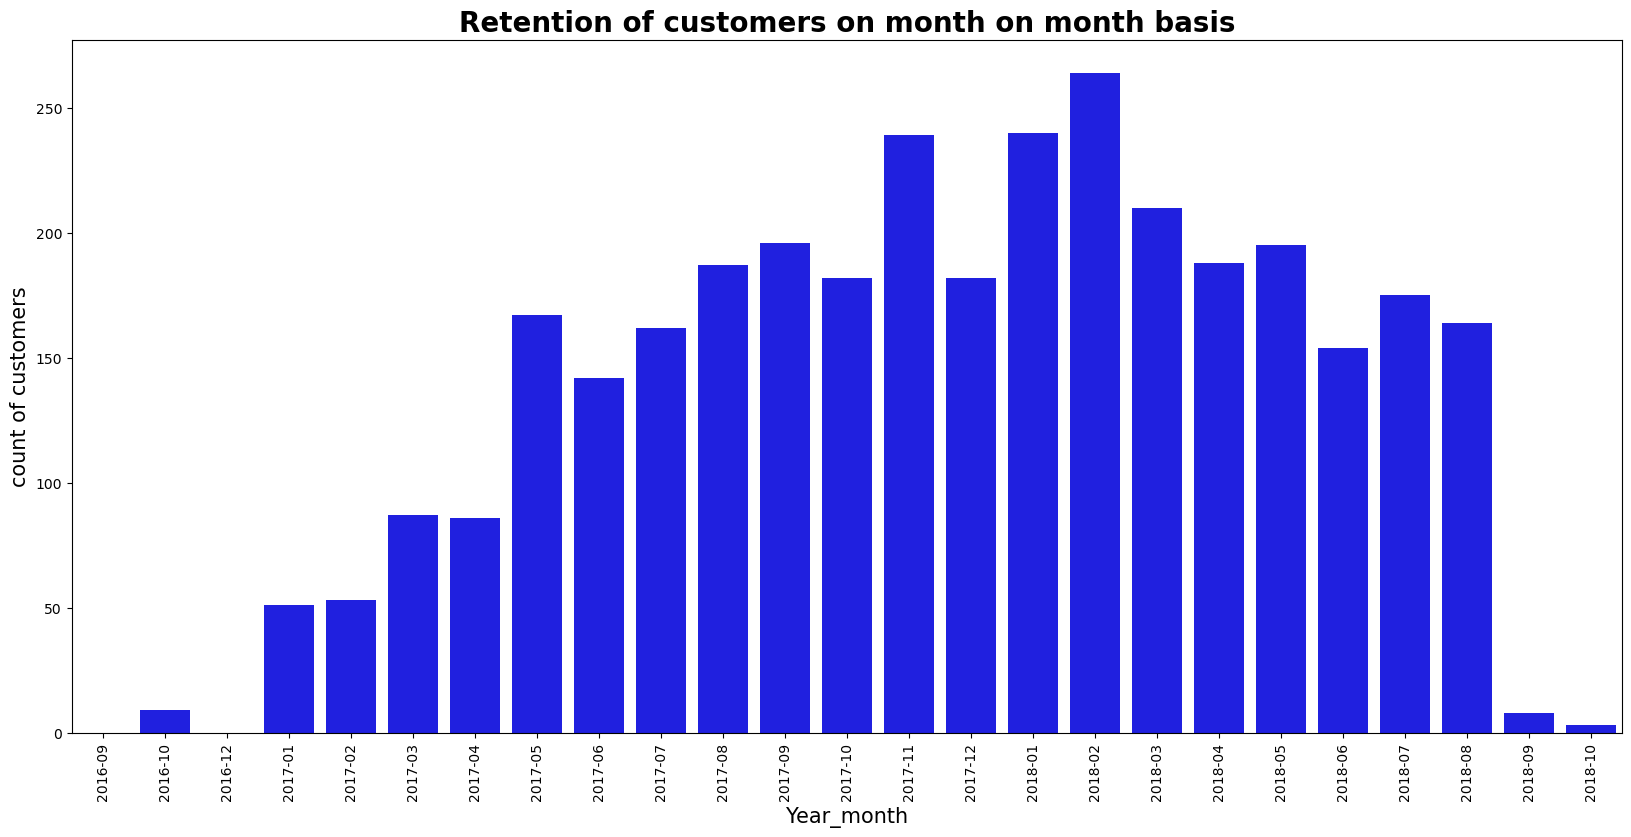

In [46]:
plt.figure(figsize=(20,9))
fig=sns.barplot(data=retented_cust_monthly, x= 'Year_month' , y = 'retented_cust', color='blue' )
plt.title('Retention of customers on month on month basis', fontweight='bold',fontsize=20)
plt.ylabel('count of customers',fontsize=15)
plt.xlabel('Year_month',fontsize=15)
plt.xticks(rotation=90)
plt.show()

##d. How the revenues from existing/new customers on month on month basis

In [47]:
mon=df.groupby(df.month_of_year).payment_value.sum().reset_index()
mon

,month_of_year,payment_value
0,2016-09,388.47
1,2016-10,76959.13
2,2016-12,19.62
3,2017-01,190366.65
4,2017-02,351230.24
5,2017-03,547556.71
6,2017-04,511767.50
7,2017-05,736382.36
8,2017-06,613152.67
9,2017-07,746440.01


<Figure size 2000x2400 with 0 Axes>

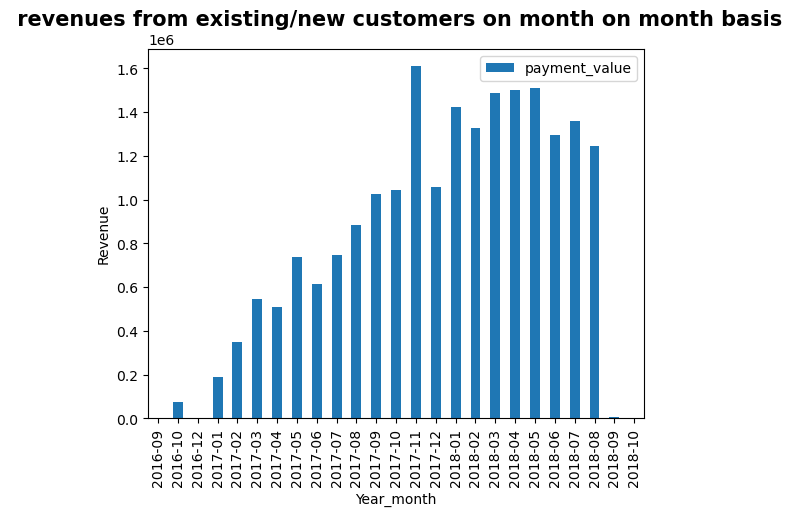

In [50]:
plt.figure(figsize=(20, 24))
mon.plot(kind ='bar', x= 'month_of_year', y ='payment_value')
plt.title(' revenues from existing/new customers on month on month basis', fontweight='bold',fontsize=15)
plt.xlabel('Year_month',fontsize=10)
plt.ylabel('Revenue',fontsize=10)
plt.show()

##e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc… 

In [51]:
df['year_week']=df.order_purchase_timestamp.apply( lambda x: pd.Timestamp.strftime(x, format= '%Y-%V'))


In [53]:
week=df.groupby(df.year_week).payment_value.sum().reset_index()
week

,year_week,payment_value
0,2016-35,272.46
1,2016-36,75.06
2,2016-37,40.95
3,2016-39,109.34
4,2016-40,71260.56
...,...,...
96,2018-37,808.46
97,2018-38,276.04
98,2018-39,453.20
99,2018-40,277.93


<Figure size 3000x1200 with 0 Axes>

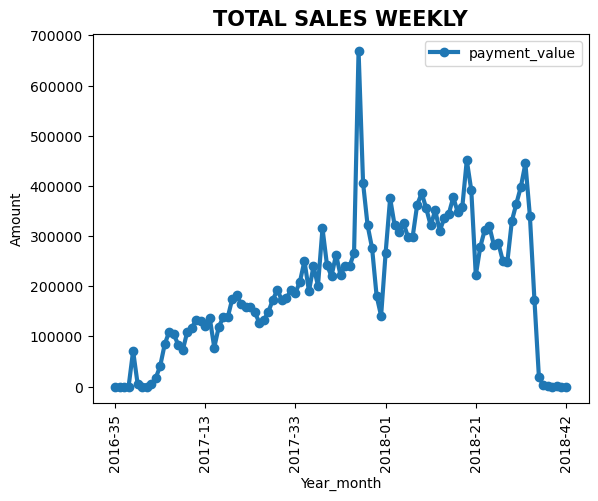

In [55]:
plt.figure(figsize=(30,12))
week.plot(kind='line', x='year_week', y='payment_value',marker="o",linewidth=3)
plt.title('TOTAL SALES WEEKLY', fontweight='bold',fontsize=15)
plt.xlabel('Year_month',fontsize=10)
plt.ylabel('Amount',fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [56]:
df['year_day']=df.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x, format='%Y-%d'))


In [57]:
day=df.groupby(df.year_day).payment_value.sum().reset_index()
day

,year_day,payment_value
0,2016-02,109.34
1,2016-03,595.14
2,2016-04,14347.77
3,2016-05,16374.63
4,2016-06,11645.27
...,...,...
70,2018-27,331006.84
71,2018-28,311749.07
72,2018-29,226559.69
73,2018-30,251849.75


<Figure size 3000x1200 with 0 Axes>

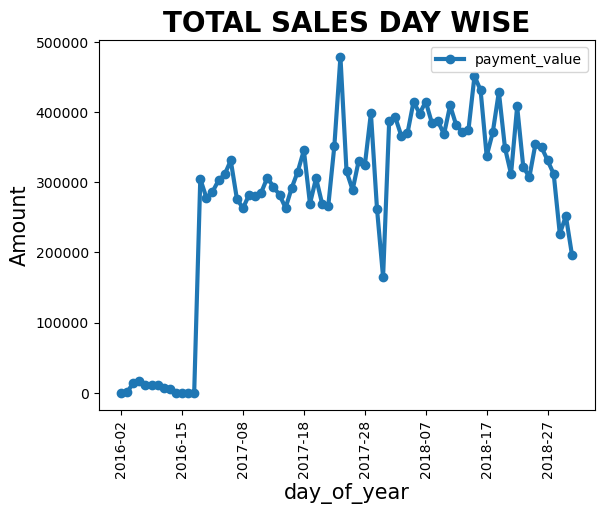

In [58]:
plt.figure(figsize=(30,12))
day.plot(kind='line', x='year_day', y='payment_value', marker="o",linewidth=3)
plt.title('TOTAL SALES DAY WISE', fontweight='bold',fontsize=20)
plt.xlabel('day_of_year',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [59]:
Qty_by_cat=df.groupby(by='product_category_name').order_id.count()
Qty_by_cat

product_category_name
Agro_Industry_And_Commerce     249
Air_Conditioning               302
Art                            219
Arts_And_Craftmanship           24
Audio                          379
                              ... 
Stationery                    2595
Tablets_Printing_Image          87
Telephony                     4697
Toys                          4259
Watches_Gifts                 6186
Name: order_id, Length: 71, dtype: int64

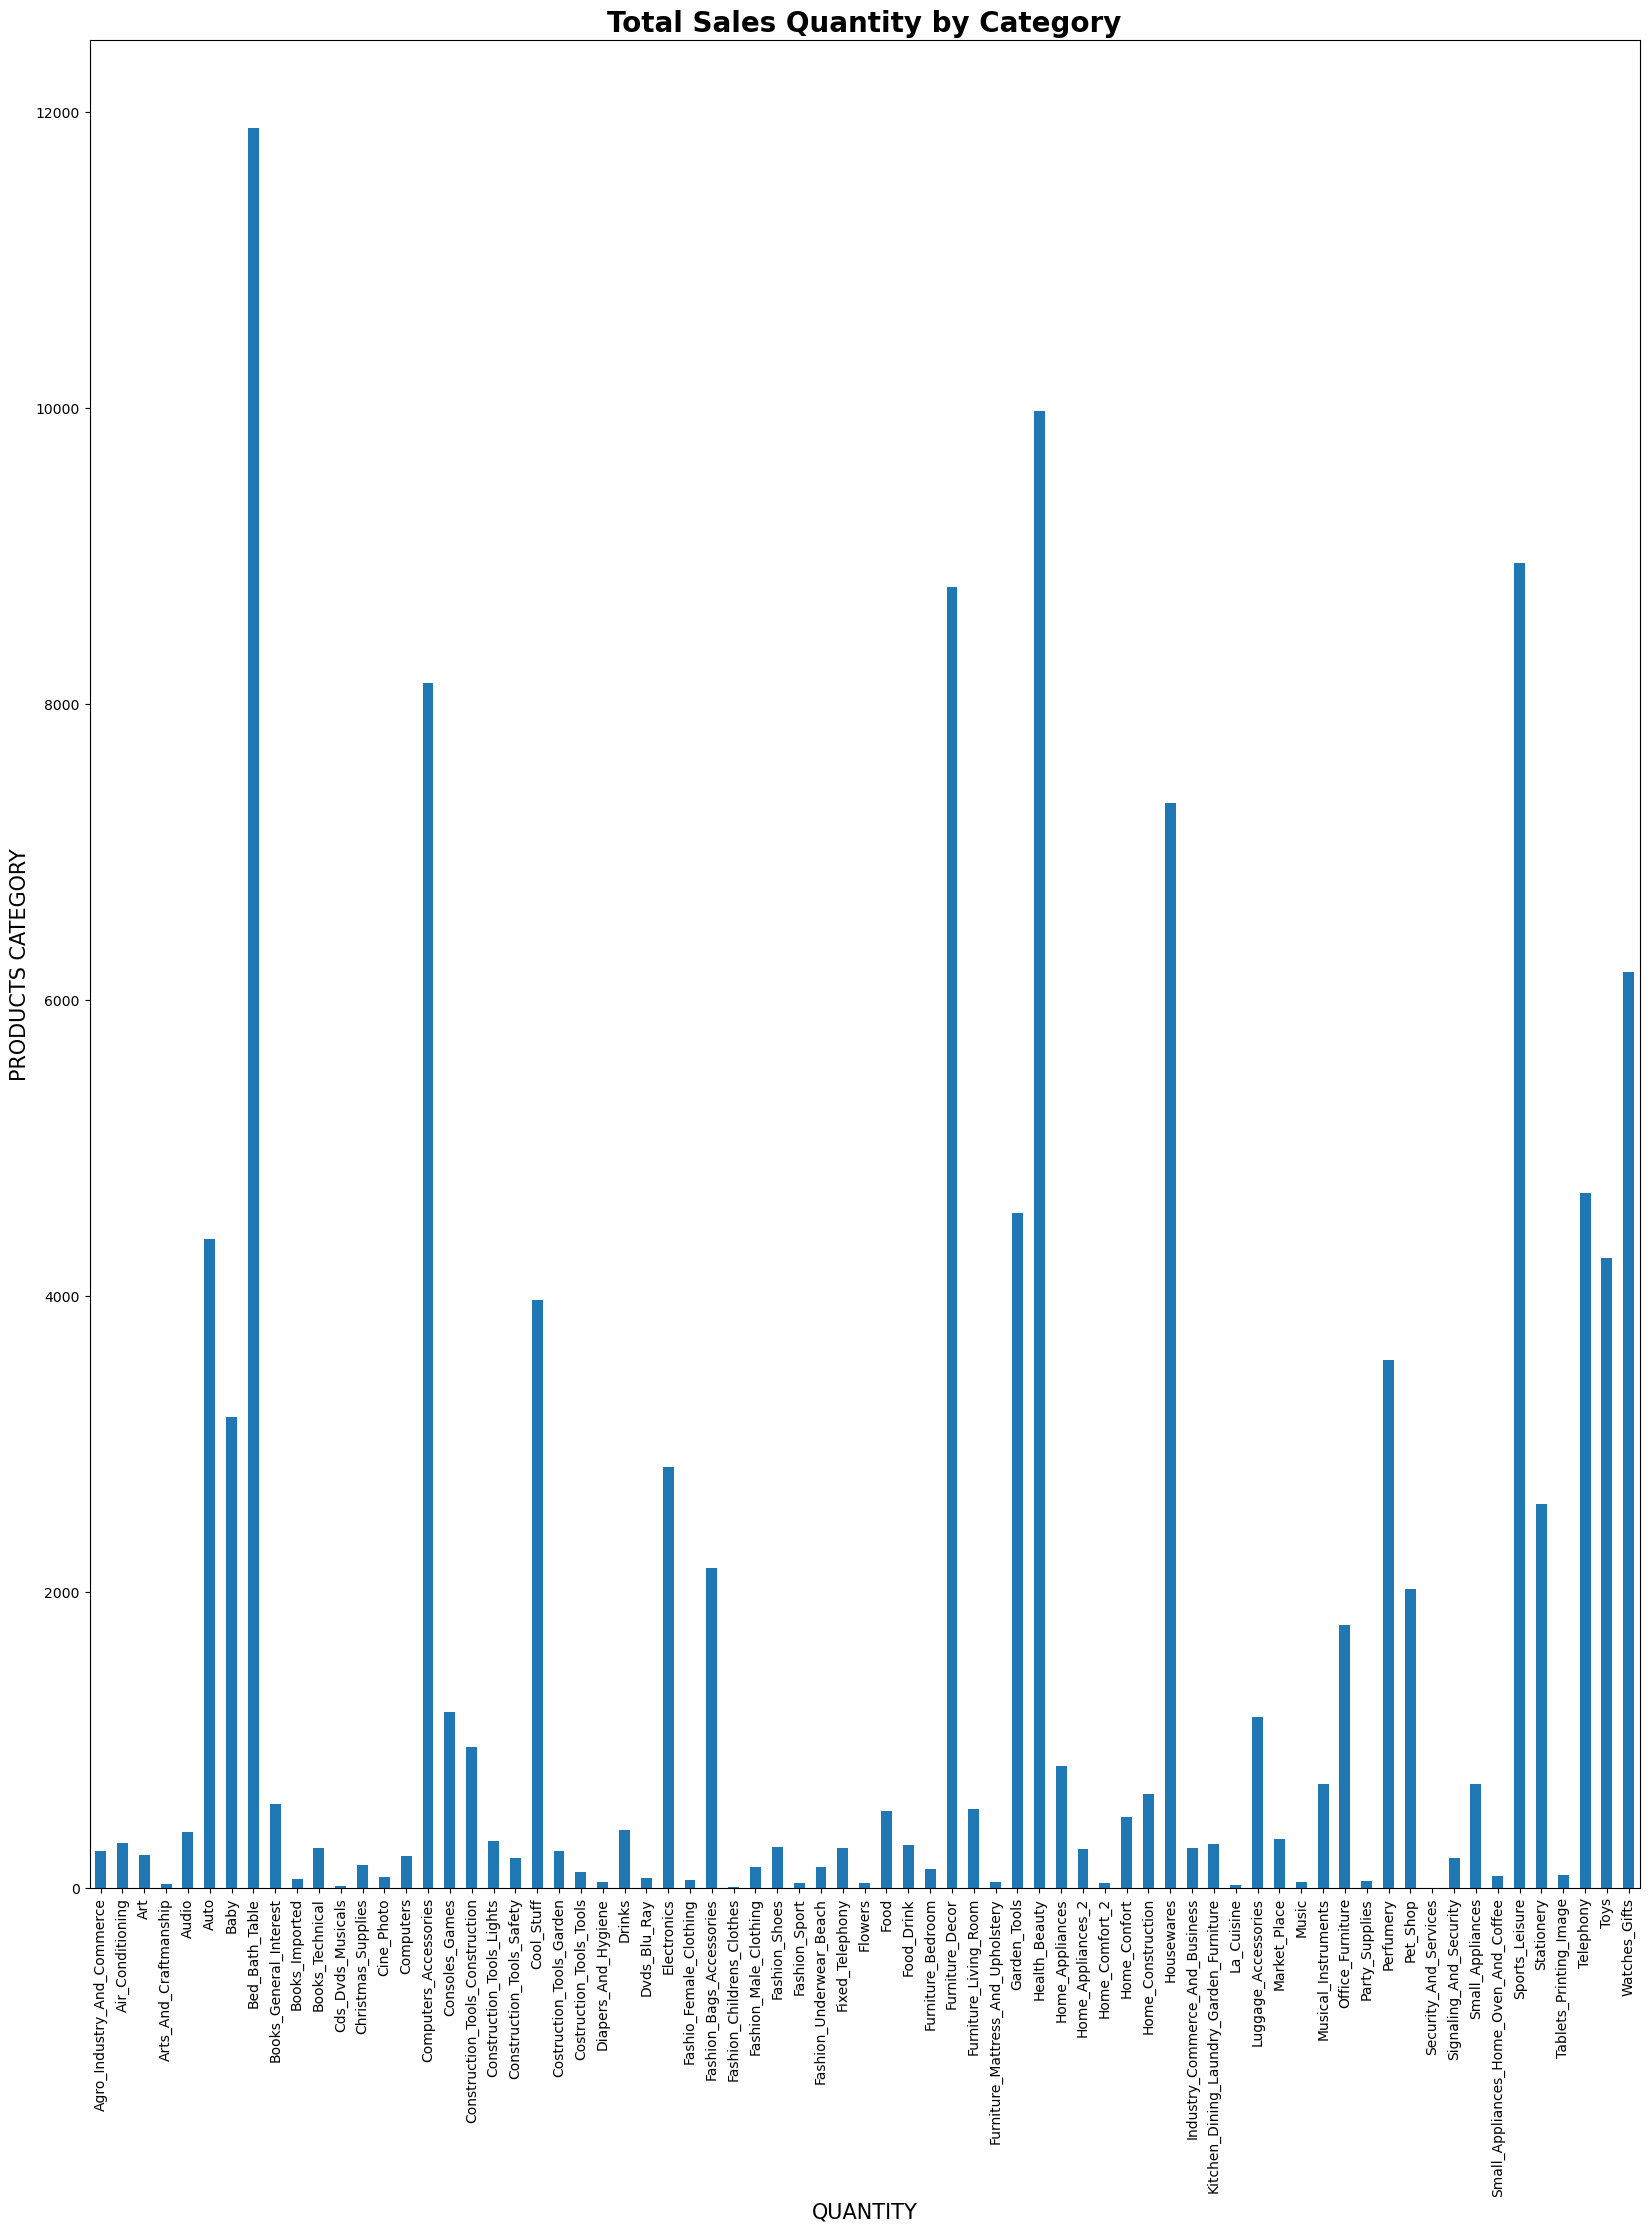

In [60]:
plt.figure(figsize=(20,24))
Qty_by_cat.plot(kind='bar', x='order_id', y='product_category_name')
plt.title('Total Sales Quantity by Category', fontweight='bold',fontsize=20)
plt.tick_params(axis="x", labelrotation=90)
plt.xlabel('QUANTITY',fontsize=15)
plt.ylabel('PRODUCTS CATEGORY',fontsize=15)
plt.show()

In [61]:
Qty_loc=df.groupby(df.customer_state).product_id.count()
Qty_loc

customer_state
Andhra Pradesh       72309
Arunachal Pradesh     1319
Chhattisgarh          7390
Delhi                 3920
Goa                     10
Gujarat               8838
Haryana               2614
Himachal Pradesh       862
Jammu & Kashmir       1822
Karnataka             4535
Kerala                1767
Madhya Pradesh        3358
Maharashtra           2320
Orissa                 697
Punjab                 770
Rajasthan              923
Tamil Nadu            2458
Uttar Pradesh         1179
Uttaranchal            110
West Bengal            427
Name: product_id, dtype: int64

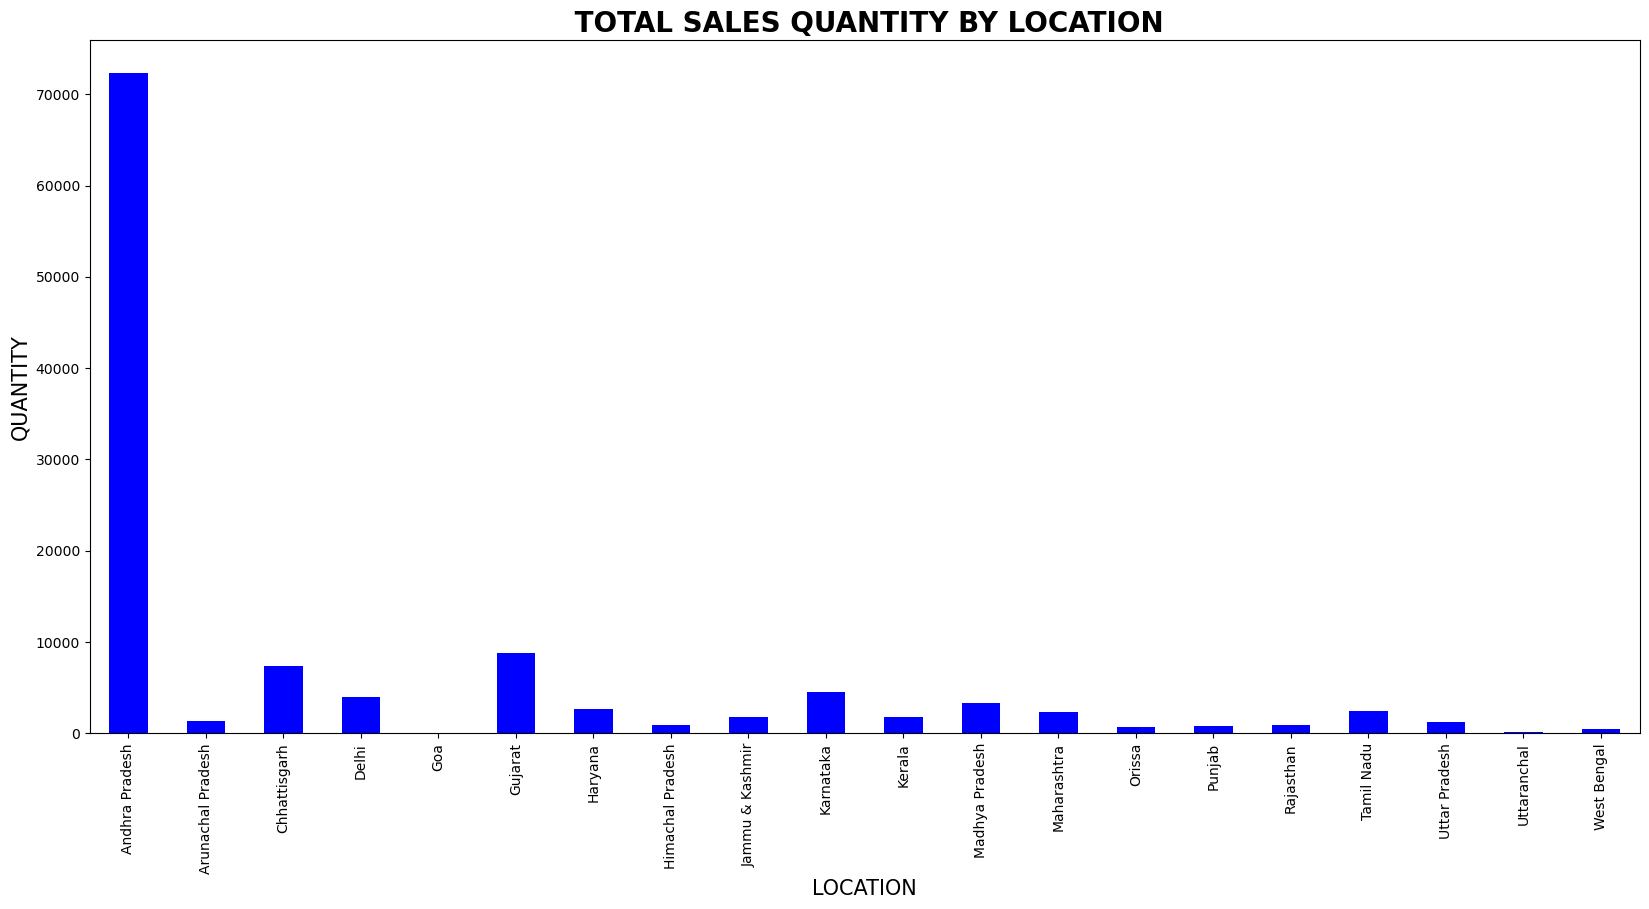

In [62]:
plt.figure(figsize=(20,9))
Qty_loc.plot(kind='bar', x='customer_state', y='product_id', color='blue' )
plt.title(' TOTAL SALES QUANTITY BY LOCATION', fontweight='bold',fontsize=20)
plt.xlabel('LOCATION',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [63]:
Qty_month=df.groupby(df.month_of_year).product_id.count().reset_index()
Qty_month

,month_of_year,product_id
0,2016-09,6
1,2016-10,385
2,2016-12,1
3,2017-01,1018
4,2017-02,2052
5,2017-03,3184
6,2017-04,2847
7,2017-05,4420
8,2017-06,3805
9,2017-07,4817


<Figure size 3000x1200 with 0 Axes>

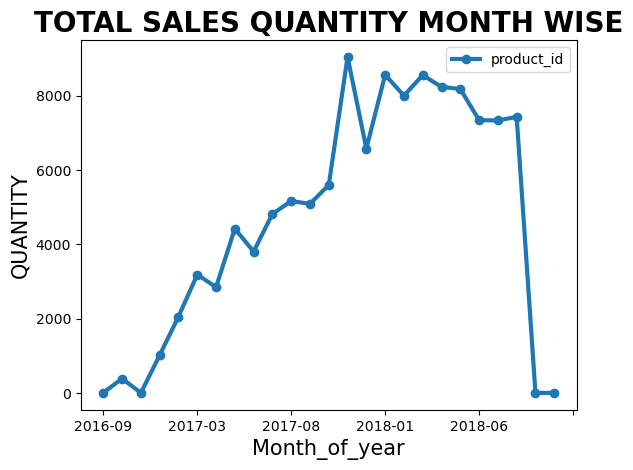

In [64]:
plt.figure(figsize=(30,12))
Qty_month.plot(kind='line', x='month_of_year', y='product_id', marker="o",linewidth=3)
plt.title('TOTAL SALES QUANTITY MONTH WISE', fontweight='bold',fontsize=20)
plt.xlabel('Month_of_year',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.show()

In [65]:
Qty_weekly=df.groupby(df.year_week).product_id.count().reset_index()
Qty_weekly

,year_week,product_id
0,2016-35,2
1,2016-36,1
2,2016-37,3
3,2016-39,1
4,2016-40,337
...,...,...
96,2018-37,0
97,2018-38,0
98,2018-39,0
99,2018-40,0


<Figure size 3000x1500 with 0 Axes>

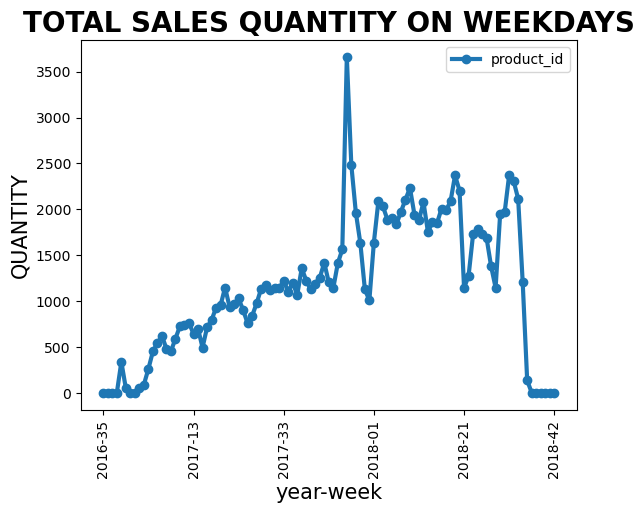

In [66]:
plt.figure(figsize=(30,15))
Qty_weekly.plot(kind='line', x='year_week', y='product_id', marker="o",linewidth=3)
plt.title('TOTAL SALES QUANTITY ON WEEKDAYS', fontweight='bold',fontsize=20)
plt.xlabel('year-week',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [67]:
Qty_month_day=df.groupby(df.year_day).product_id.count().reset_index()
Qty_month_day

,year_day,product_id
0,2016-02,1
1,2016-03,8
2,2016-04,78
3,2016-05,60
4,2016-06,58
...,...,...
70,2018-27,1834
71,2018-28,1729
72,2018-29,1346
73,2018-30,1427


<Figure size 3000x1400 with 0 Axes>

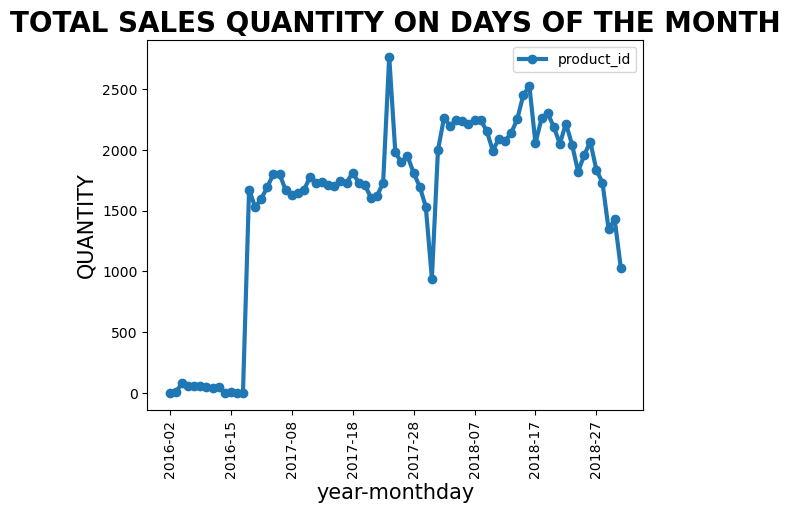

In [68]:
plt.figure(figsize=(30,14))
Qty_month_day.plot(kind='line', x='year_day', y='product_id', marker="o",linewidth=3)
plt.title('TOTAL SALES QUANTITY ON DAYS OF THE MONTH', fontweight='bold',fontsize=20)
plt.xlabel('year-monthday',fontsize=15)
plt.ylabel('QUANTITY',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [69]:
Prod_pay=df.groupby(df.payment_type).product_id.count()
Prod_pay

payment_type
UPI            23018
credit_card    87245
debit_card      1699
not_defined        0
voucher         5663
Name: product_id, dtype: int64

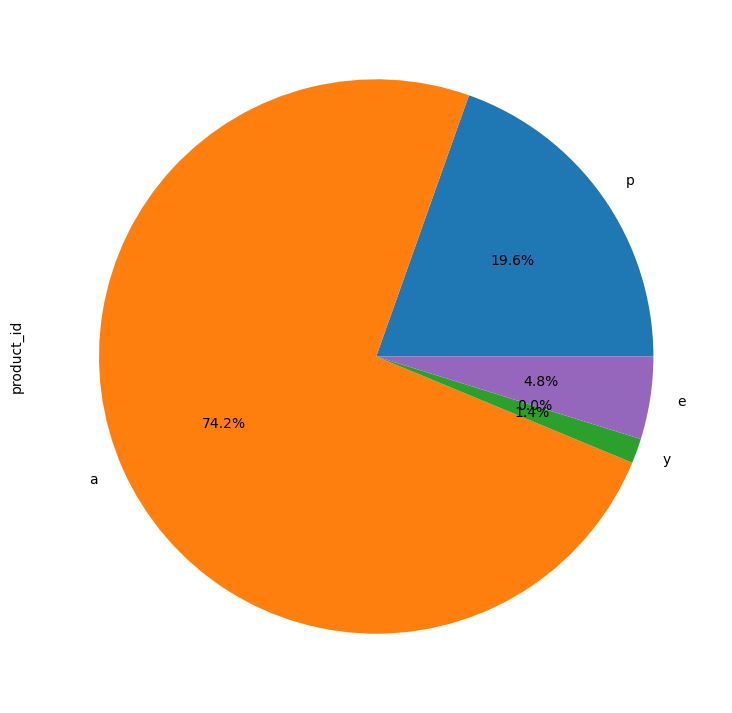

In [70]:
plt.figure(figsize=(15,9))
Prod_pay.plot(kind='pie', x= 'product_id', labels='payment_type', autopct="%1.1f%%")
plt.show()

##f. Popular Products by month, seller, state, category.

In [71]:
Prod_mon=df[['month_of_year','product_id', 'order_id']].groupby(['month_of_year','product_id']).aggregate('count').reset_index()


In [72]:
Prod_mon=Prod_mon.sort_values(['month_of_year','order_id' ], ascending=[True, False]).drop_duplicates('month_of_year')
Prod_mon

,month_of_year,product_id,order_id
0,2016-09,5a6b04657a4c5ee34285d1e4619a96b4,3
257,2016-10,eba7488e1c67729f045ab43fac426f2e,11
278,2016-12,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1
413,2017-01,37eb69aca8718e843d897aa7b82f462d,15
1704,2017-02,a703f5ade6e4fae527357132230ea778,13
3013,2017-03,7e0dc102074f8285580c9777f79c90cf,45
4902,2017-04,99a4788cb24856965c36a24e339b6058,38
7009,2017-05,99a4788cb24856965c36a24e339b6058,66
8489,2017-06,42a2c92a0979a949ca4ea89ec5c7b934,73
12381,2017-07,f1c7f353075ce59d8a6f3cf58f419c9c,63


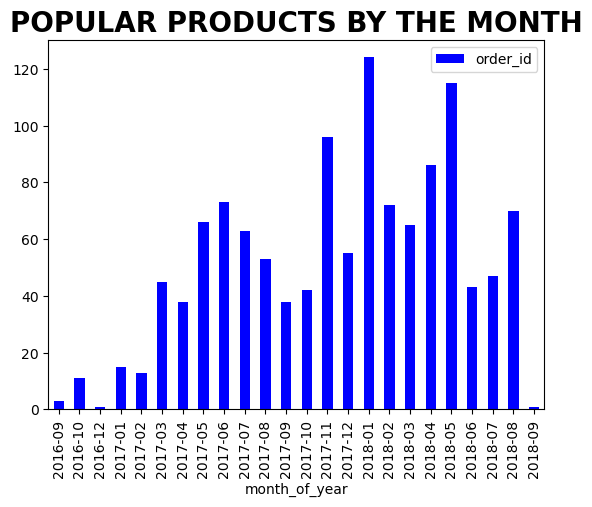

In [73]:
Prod_mon.plot(kind='bar', x='month_of_year', y='order_id', color= 'blue')
plt.title('POPULAR PRODUCTS BY THE MONTH', fontweight='bold',fontsize=20)
plt.show()

In [74]:
Prod_sell=df[['seller_city','product_id','order_id']].groupby(['seller_city','product_id']).aggregate('count').reset_index()


In [75]:
Prod_sell=Prod_sell.sort_values(['seller_city','order_id'], ascending=[True, False]).drop_duplicates('seller_city')
Prod_sell

,seller_city,product_id,order_id
0,Aadityana,72bf8fd8b4596a7fa2c2cfab031204ed,1
9,Aarambhada,7e6850f360e60da72b7d3b1b37f42312,7
15,Achabal,a48a82499de633cdd782856d69789b62,1
17,Adalaj,4e5dc46fe4e31dd605f374ee43f0268e,10
144,Adilabad,8c292ca193d326152e335d77176746f0,92
...,...,...,...
33346,Yellandu,4618f9c46ea4592eccee4a62718e1560,2
33355,Yemmiganur,304104a478e3a605db6072a22e4ee228,12
33512,Zahirabad,fbce4c4cb307679d89a3bf3d3bb353b9,63
33515,Ziauddin Pur,08574b074924071f4e201e151b152b4e,115


<Figure size 2000x2400 with 0 Axes>

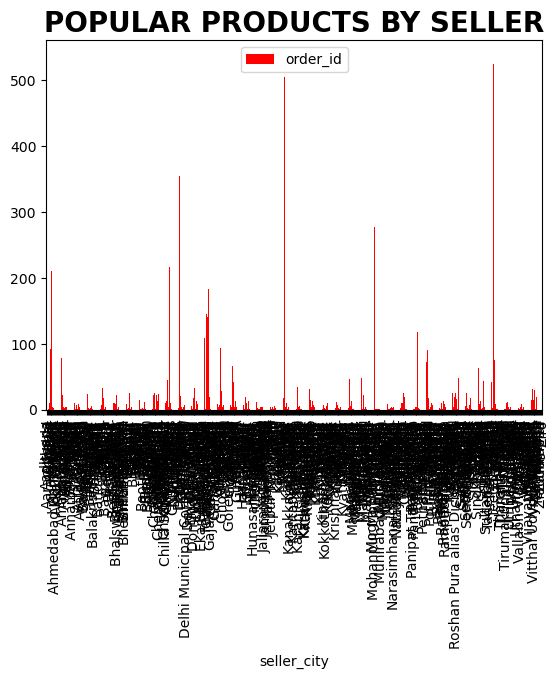

In [78]:
plt.figure(figsize =(20,24))
Prod_sell.plot(kind='bar', y='order_id', x='seller_city', color='red')
plt.title('POPULAR PRODUCTS BY SELLER', fontweight='bold',fontsize=20)
plt.show()

In [79]:
Prod_state=df[['customer_state', 'product_id','order_id']].groupby(['customer_state','product_id' ]).aggregate('count').reset_index()


In [80]:
Prod_state=Prod_state.sort_values(['customer_state', 'order_id'], ascending=[True, False]).drop_duplicates('customer_state')
Prod_state


,customer_state,product_id,order_id
16353,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,346
24307,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,12
26503,Chhattisgarh,422879e10f46682990de24d770e7f83d,41
30802,Delhi,53759a2ecddad2bb87a079a1f1519f73,24
32584,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,1
36062,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,50
38231,Haryana,35afc973633aaeb6b877ff57b2793310,15
39873,Himachal Pradesh,422879e10f46682990de24d770e7f83d,6
41114,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
42520,Karnataka,422879e10f46682990de24d770e7f83d,25


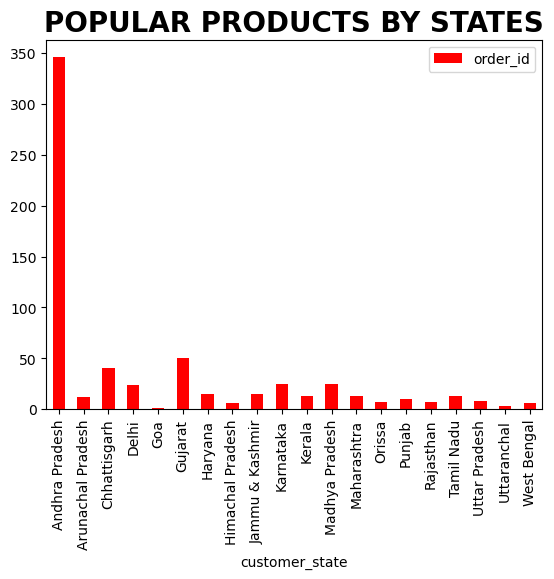

In [81]:
Prod_state.plot(kind='bar', x='customer_state', color='red' ,y='order_id')
plt.title('POPULAR PRODUCTS BY STATES', fontweight='bold',fontsize=20)
plt.show()

In [82]:
Prod_cat=df[['product_category_name', 'product_id','order_id']].groupby(['product_category_name', 'product_id']).aggregate('count').reset_index()


In [83]:
Prod_cat=Prod_cat.sort_values(['product_category_name','order_id'], ascending=[True, False]).drop_duplicates('product_category_name')
Prod_cat

,product_category_name,product_id,order_id
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,44
144,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
218,Art,4fe644d766c7566dbc46fb851363cb3b,109
267,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
316,Audio,db5efde3ad0cc579b130d71c4b2db522,50
...,...,...,...
28426,Stationery,fb55982be901439613a95940feefd9ee,85
28449,Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4,35
29470,Telephony,e7cc48a9daff5436f63d3aad9426f28b,95
30360,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,106


<Figure size 2000x2400 with 0 Axes>

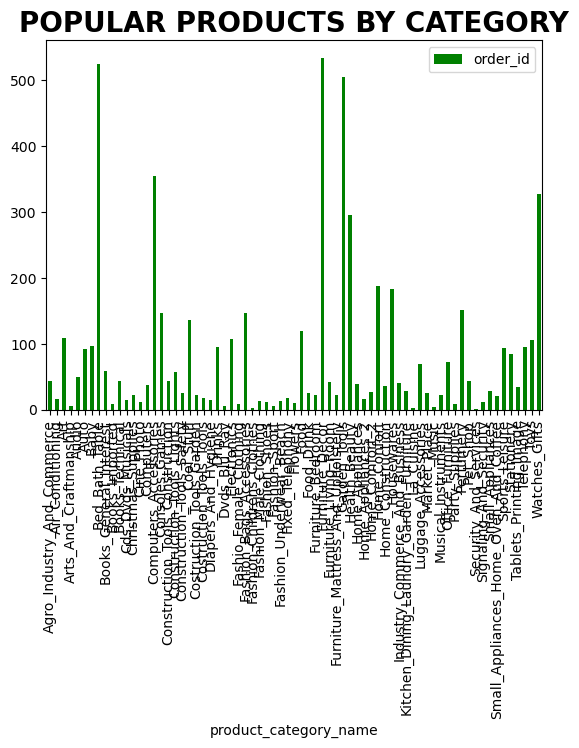

In [84]:
plt.figure(figsize=(20,24))
Prod_cat.plot(kind='bar', x='product_category_name', y='order_id', color='green')
plt.title('POPULAR PRODUCTS BY CATEGORY', fontweight='bold',fontsize=20)
plt.show()

##g. Popular categories by state, month

In [85]:
St_mon=df[['customer_state','product_category_name','order_id']].groupby(['customer_state','product_category_name']).aggregate('count').reset_index()

In [86]:
St_mon=St_mon.sort_values(['customer_state' ,'order_id'], ascending=[True, False]).drop_duplicates('customer_state')
St_mon

,customer_state,product_category_name,order_id
7,Andhra Pradesh,Bed_Bath_Table,7662
77,Arunachal Pradesh,Bed_Bath_Table,128
132,Chhattisgarh,Bed_Bath_Table,726
229,Delhi,Health_Beauty,334
255,Goa,Auto,1
272,Gujarat,Bed_Bath_Table,808
339,Haryana,Bed_Bath_Table,296
396,Himachal Pradesh,Bed_Bath_Table,85
448,Jammu & Kashmir,Bed_Bath_Table,178
505,Karnataka,Bed_Bath_Table,407


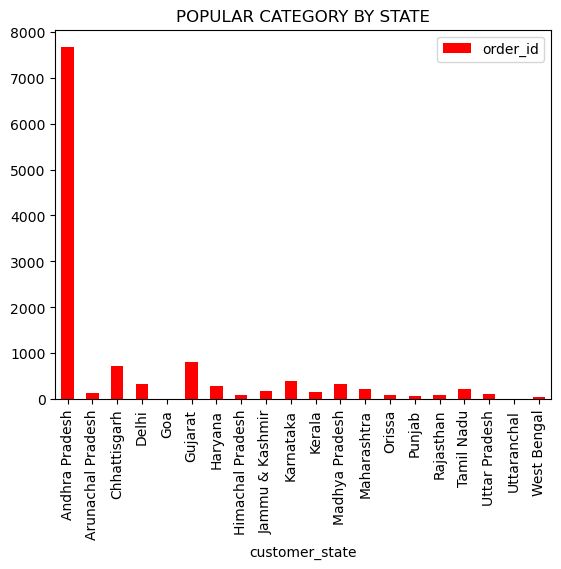

In [87]:
St_mon.plot(kind='bar', x='customer_state', color='red', y='order_id')
plt.title('POPULAR CATEGORY BY STATE')
plt.show()

In [88]:
St_mon=df[['month_of_year','product_category_name','order_id']].groupby(['month_of_year','product_category_name']).aggregate('count').reset_index()

In [89]:
St_mon=St_mon.sort_values(['month_of_year' ,'order_id'], ascending=[True, False]).drop_duplicates('month_of_year')
St_mon

,month_of_year,product_category_name,order_id
1,2016-09,Health_Beauty,3
21,2016-10,Furniture_Decor,80
34,2016-12,Fashion_Bags_Accessories,1
56,2017-01,Furniture_Decor,204
105,2017-02,Furniture_Decor,283
155,2017-03,Furniture_Decor,346
187,2017-04,Bed_Bath_Table,309
246,2017-05,Bed_Bath_Table,426
303,2017-06,Bed_Bath_Table,431
363,2017-07,Bed_Bath_Table,641


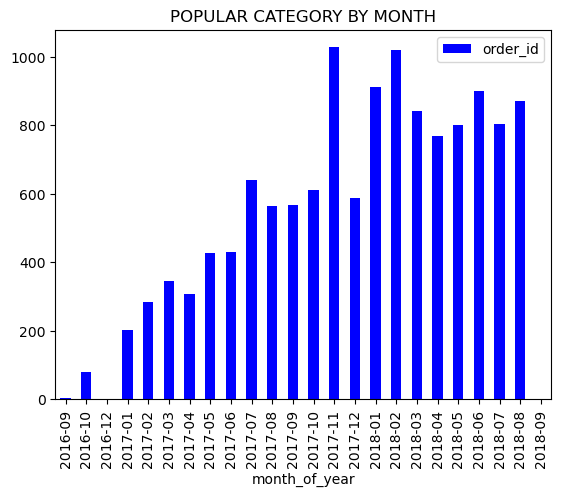

In [90]:
St_mon.plot(kind='bar', x='month_of_year', color='blue', y='order_id')
plt.title('POPULAR CATEGORY BY MONTH')
plt.show()

##h. List top 10 most expensive products sorted by price 

In [91]:
Exp_prod=df.groupby(df.product_category_name).price.sum().sort_values(ascending= False).reset_index().head(10)
Exp_prod

,product_category_name,price
0,Health_Beauty,1295152.41
1,Watches_Gifts,1251312.51
2,Bed_Bath_Table,1101963.55
3,Sports_Leisure,1024136.32
4,Computers_Accessories,947665.59
5,Furniture_Decor,768556.72
6,Housewares,665525.49
7,Cool_Stuff,661576.55
8,Auto,616742.46
9,Garden_Tools,515578.67


<Figure size 2000x900 with 0 Axes>

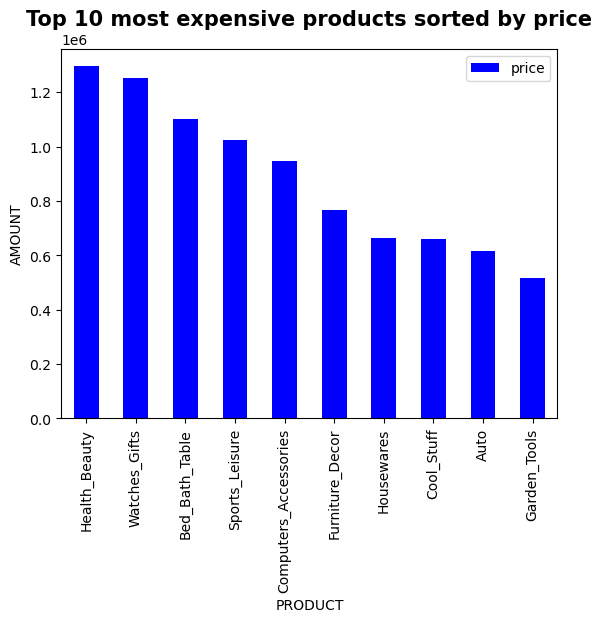

In [93]:
plt.figure(figsize=(20,9))
Exp_prod.plot(kind='bar', x='product_category_name', y='price', color='blue' )
plt.title('Top 10 most expensive products sorted by price', fontweight='bold',fontsize=15)
plt.xlabel('PRODUCT',fontsize=10)
plt.ylabel('AMOUNT',fontsize=10)
plt.xticks(rotation=90)
plt.show()

##2. Performing Customers/sellers Segmentation 
a. Divide the customers into groups based on the revenue generated  

In [94]:
Tot_rev=df.groupby(by='customer_unique_id')[['payment_value']].sum().reset_index()

In [95]:
Tot_rev.rename(columns={'payment_value': 'total_revenue_per_customer'}, inplace=True)

In [96]:
df=pd.merge(left=df,right=Tot_rev, on='customer_unique_id',how='left')

In [97]:
print('Min=',df.total_revenue_per_customer.min())
print('Max=',df.total_revenue_per_customer.max())
print('Mean=',df.total_revenue_per_customer.mean())

Min= 0.0
Max= 109312.64
Mean= 383.427429712433


In [98]:
df['customer_segment']=df.total_revenue_per_customer.apply(lambda x: 'high budget' if x>1000  else 'mid budget' if  (x>=500 )
                                                               else 'low budget' if (x>=1) else 'zero spend' )


In [99]:
Cust_seg=df.customer_segment.value_counts().reset_index()
Cust_seg

,customer_segment,count
0,low budget,102065
1,mid budget,9032
2,high budget,7340
3,zero spend,5


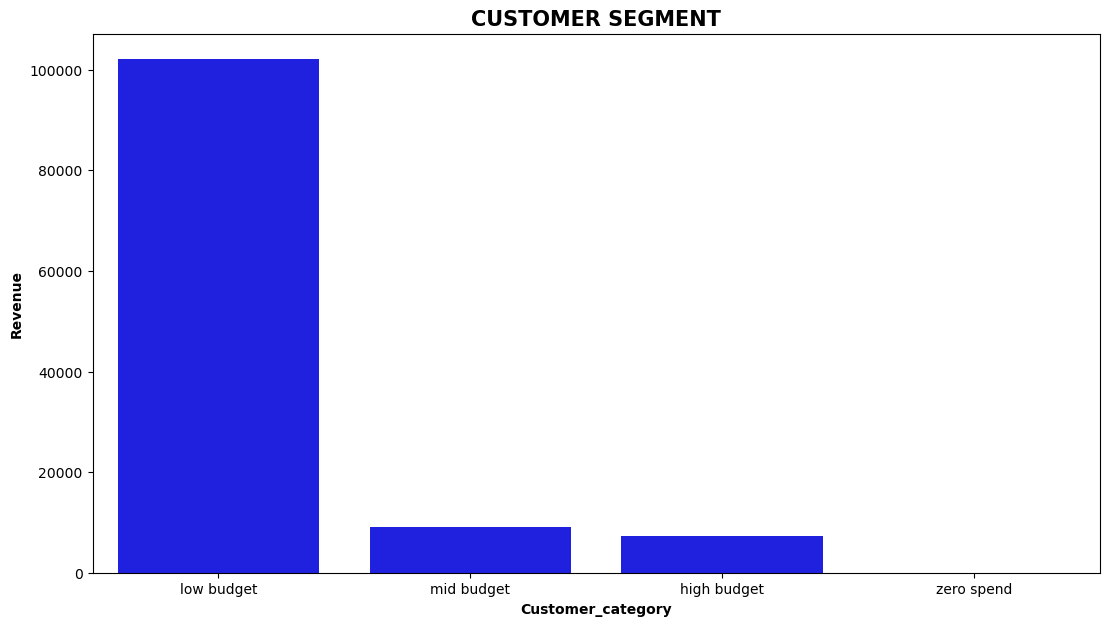

In [100]:
plt.figure(figsize=(13, 7))
fig=sns.barplot(data = Cust_seg, y= 'count', x='customer_segment', color='blue')
plt.title('CUSTOMER SEGMENT', fontsize=15, fontweight='bold')
plt.xlabel("Customer_category" , fontsize=10, fontweight='bold')
plt.ylabel("Revenue" , fontsize=10, fontweight='bold')
plt.show()

##2. Performing Customers/sellers Segmentation 
b. Divide the sellers into groups based on the revenue generated  

In [101]:
Trs=df.groupby(df.seller_id).price.sum().reset_index()

In [102]:
Trs.rename(columns={'price':'populer_prod_by_seller'}, inplace=True)

In [103]:
df=pd.merge(left=df, right= Trs, how='left', on='seller_id')

In [104]:
print('Min=',df.populer_prod_by_seller.min())
print('Mean=',df.populer_prod_by_seller.mean())
print('Max=',df.populer_prod_by_seller.max())

Min= 3.5
Mean= 42586.716998078686
Max= 237695.75


In [105]:
df['seller_segment']=df.populer_prod_by_seller.apply(lambda x:  'best seller' if x>150000 else 'good seller' if (x>=50000) 
                                                         else 'bad seller' if (x>=20000) else 'worst seller')

In [106]:
Sell_seg=df.seller_segment.value_counts().reset_index()
Sell_seg

,seller_segment,count
0,worst seller,67935
1,bad seller,21872
2,good seller,20825
3,best seller,7810


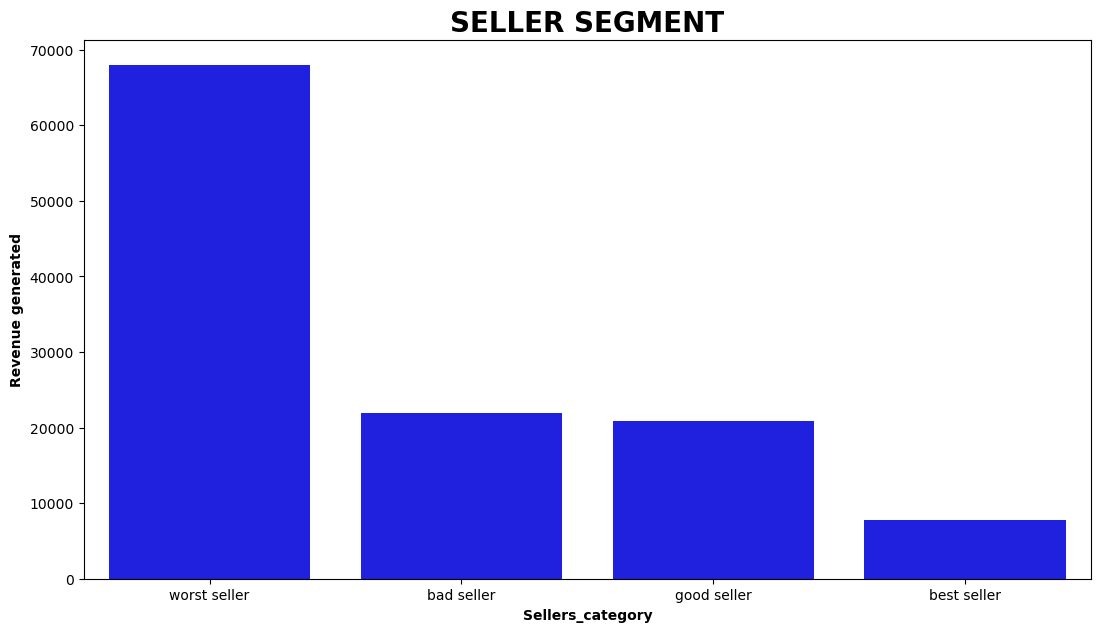

In [107]:
plt.figure(figsize=(13,7))
fig=sns.barplot(data= Sell_seg, y='count', x='seller_segment', color='blue')
plt.xlabel('Sellers_category', fontsize=10, fontweight='bold')
plt.ylabel('Revenue generated', fontsize= 10, fontweight='bold')
plt.title('SELLER SEGMENT', fontsize=20, fontweight='bold')
plt.show()

##3. Cross-Selling (Which products are selling together) 

In [108]:
order_ord_item = pd.merge(order , order_item , how='left' , on='order_id' )
order_ord_item.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-07,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76


In [109]:
cross_selling = order_ord_item[order_ord_item.duplicated(['order_purchase_timestamp','customer_id'],
                                                                 keep=False)].sort_values(by='order_purchase_timestamp')
cross_selling = cross_selling.loc[:,['customer_id','order_purchase_timestamp','product_id' ]]

cross_selling.drop_duplicates(subset ="product_id" ,inplace=True)
cross_selling = cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],
                                                       keep=False)].sort_values(by='order_purchase_timestamp').reset_index()
cross_selling.drop(columns = 'index',axis=1, inplace=True)

print('Products with same customer id and order purchase timestamp are cross selling')
cross_selling

Products with same customer id and order purchase timestamp are cross selling


,customer_id,order_purchase_timestamp,product_id
0,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,f293394c72c9b5fafd7023301fc21fc2
1,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,c1488892604e4ba5cff5b4eb4d595400
2,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,79938780eb7ffb7289f59a9a283bc06b
3,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,8f1e43e0e3374ed8c84df748034d6179
4,00474d2582fd72663036795b7ab8cfc1,2016-10-04 22:33:00,35bd74b6319ba18ae4f30d8b54144fd2
...,...,...,...
3566,72a366446dd3abfc90c598896714d85c,2018-08-26 11:02:00,7052c556fc966a2321d570f3c5a8790f
3567,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,df4bcf4a328103951507064660c445e9
3568,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,3af5874bd2429ed183a5445d1432fcde
3569,c24bbeb8111fea27eab791a37e665210,2018-08-27 12:39:00,b6b220a6c539cb65be34eed6fea8fe63


##4. Payment Behaviour 
a. How customers are paying?

In [110]:
Paying=df.payment_type.value_counts().reset_index()
Paying

,payment_type,count
0,credit_card,87763
1,UPI,23190
2,voucher,5777
3,debit_card,1706
4,not_defined,3


<Figure size 1300x800 with 0 Axes>

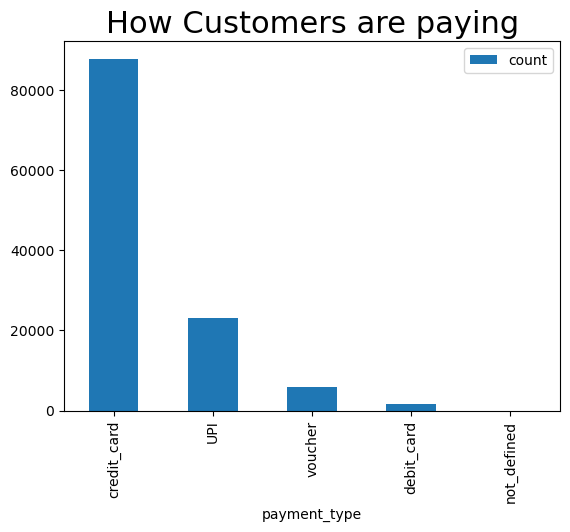

In [111]:
plt.figure(figsize=(13,8))
Paying.plot(kind='bar',x='payment_type', y ='count')
plt.title("How Customers are paying", fontsize=22)
plt.show()

##b. Which payment channels are used by most customers?

<Figure size 1300x700 with 0 Axes>

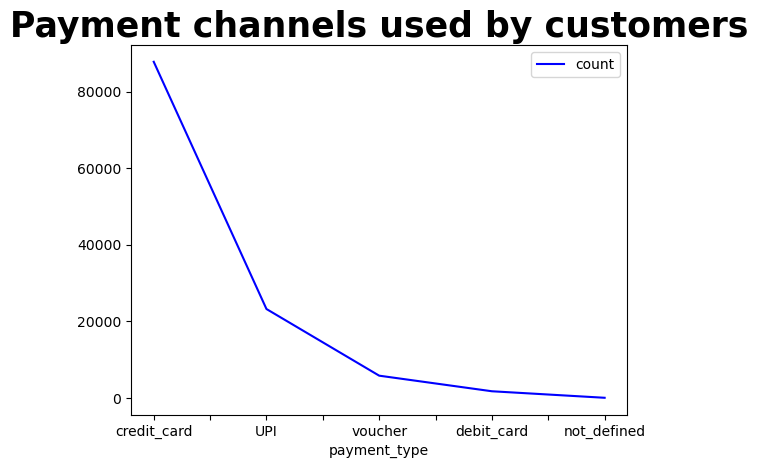

In [112]:
plt.figure(figsize=(13,7))
Paying.plot(kind='line', y= 'count', x='payment_type', color=['blue'])
plt.title('Payment channels used by customers', fontsize=25, fontweight='bold')
plt.show()

##5. Customer satisfaction towards category & product 
a. Which categories (top 10) are maximum rated & minimum rated? 

In [113]:
Max_rat=df.groupby(df.product_category_name).review_score.mean().sort_values(ascending=False).reset_index().head(10)
Max_rat

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.431858
3,Books_Imported,4.419355
4,Books_Technical,4.345588
5,Costruction_Tools_Tools,4.333333
6,Small_Appliances_Home_Oven_And_Coffee,4.320513
7,Food_Drink,4.307958
8,Luggage_Accessories,4.290799
9,Fashion_Sport,4.258065


<Figure size 1300x700 with 0 Axes>

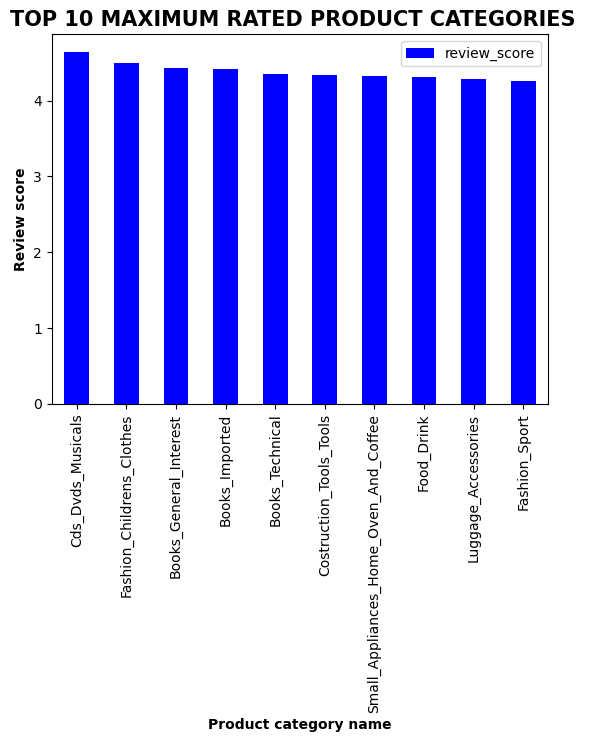

In [114]:
plt.figure(figsize=(13,7))
Max_rat.plot(kind='bar', x= 'product_category_name', y='review_score', color='blue')
plt.xlabel("Product category name", fontsize=10, fontweight= 'bold')
plt.ylabel("Review score", fontsize=10, fontweight= 'bold')
plt.title('TOP 10 MAXIMUM RATED PRODUCT CATEGORIES  ', fontsize=15, fontweight='bold')
plt.show()

In [115]:
Min_rat=df.groupby('product_category_name').review_score.mean().sort_values(ascending=True).reset_index().head(10)
Min_rat

,product_category_name,review_score
0,Security_And_Services,2.500000
1,Diapers_And_Hygiene,3.256410
2,Home_Comfort_2,3.387097
3,Office_Furniture,3.508742
4,Fashion_Male_Clothing,3.528169
5,Fixed_Telephony,3.661765
6,Fashio_Female_Clothing,3.780000
7,Party_Supplies,3.795455
8,Furniture_Mattress_And_Upholstery,3.804878
9,Audio,3.817942


<Figure size 1300x700 with 0 Axes>

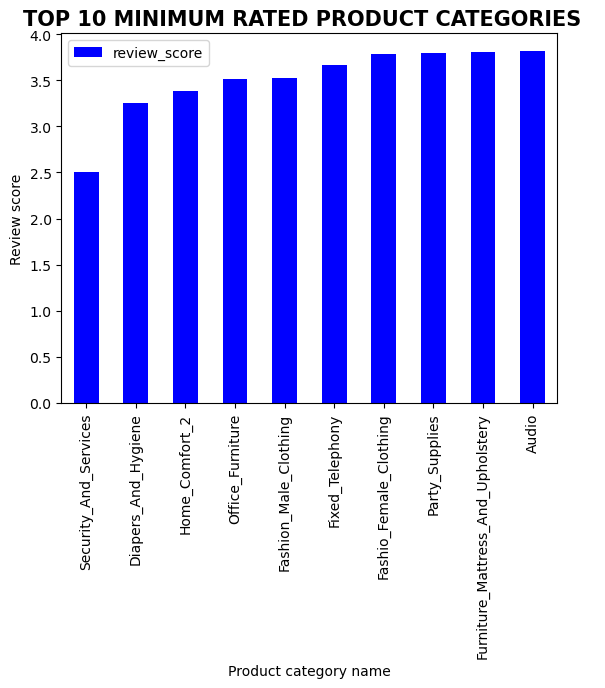

In [116]:
plt.figure(figsize=(13,7))
Min_rat.plot(kind='bar', x= 'product_category_name', y='review_score', color='blue')
plt.xlabel("Product category name", fontsize=10)
plt.ylabel("Review score", fontsize=10)
plt.title('TOP 10 MINIMUM RATED PRODUCT CATEGORIES  ', fontsize=15, fontweight='bold')
plt.show()

##b. Which products (top10) are maximum rated & minimum rated? 

In [117]:
Prod_max_rat=df.groupby(df.product_id).review_score.mean().sort_values(ascending=False).reset_index().head(10)
Prod_max_rat

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,86743ff92eee3d16b7df59cddd583b8c,5.0
2,868ceb027ab706a4dee42e2220006b85,5.0
3,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
4,868766ed2172644fdd977d6bd395a107,5.0
5,8684bd8f93b4f4038d07188a23811e93,5.0
6,867c96d2bb67aba6500a4c509cf76072,5.0
7,867b820367ec206b38a357f2c12454b7,5.0
8,867901d7e8488fb97f1fb538c09d476e,5.0
9,865bfa00c1dad8f4146d3c2765f051ca,5.0


<Figure size 1300x700 with 0 Axes>

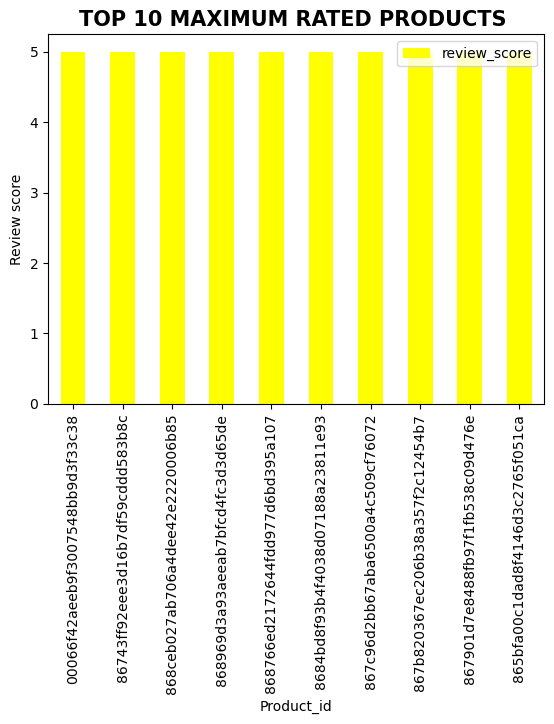

In [118]:
plt.figure(figsize=(13,7))
Prod_max_rat.plot(kind='bar', x= 'product_id', y='review_score', color='yellow')
plt.xlabel('Product_id', fontsize=10)
plt.ylabel("Review score", fontsize=10)
plt.title('TOP 10 MAXIMUM RATED PRODUCTS ', fontsize=15, fontweight='bold')
plt.show()

In [119]:
Prod_min_rat=df.groupby(df.product_id).review_score.mean().sort_values(ascending=True).reset_index().head(10)
Prod_min_rat

,product_id,review_score
0,592cc6634d2c783d297effc0b828bc37,1.0
1,c7b99e577e7d7948c7fab1d7c1326d22,1.0
2,328de56b9fe359835173118dee79a12a,1.0
3,328818bbb9f31efcf6a2b39ce8724ab6,1.0
4,ea7372593696ba29709de6d6d3092f48,1.0
5,f8cc518b0812bb0ee889350296f284e4,1.0
6,ea74c867ca62f47d2c6bb8f14bdd34df,1.0
7,f8c6a76085bd3b4341cccb774b554c82,1.0
8,3279fec9ed308116c0546336bf7741f6,1.0
9,ea768069ca084e95a752ee7d51a8ff70,1.0


<Figure size 1300x700 with 0 Axes>

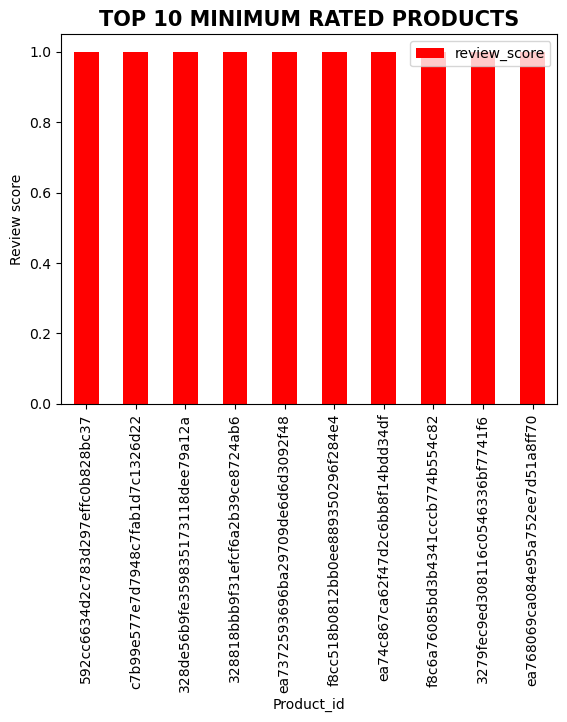

In [120]:
plt.figure(figsize=(13,7))
Prod_min_rat.plot(kind='bar', x= 'product_id', y='review_score', color='red')
plt.xlabel('Product_id', fontsize=10)
plt.ylabel("Review score", fontsize=10)
plt.title('TOP 10 MINIMUM RATED PRODUCTS', fontsize=15, fontweight='bold')
plt.show()

##c. Average rating by location, seller, product, category, month etc. 

In [121]:
Avg_sell=df.groupby(df.seller_id).review_score.mean().sort_values(ascending=False).reset_index()
Avg_sell

,seller_id,review_score
0,c18309219e789960add0b2255ca4b091,5.0
1,9c1c0c36cd23c20897e473901a8fb149,5.0
2,544863df86ed3b78a04e0820d41430ee,5.0
3,247587846358bb1d2e4c6522020b36fe,5.0
4,9d69ba0a7a626a64dc5db08e529559cf,5.0
...,...,...
3090,f524ad65d7e0f1daab730ef2d2e86196,1.0
3091,749e7cdabbaf72f16677859e27874ba5,1.0
3092,f5403d3f50089112c4eed37928b7f622,1.0
3093,dadc51ef321949ec9a3ab25cd902e23d,1.0


<Figure size 1300x700 with 0 Axes>

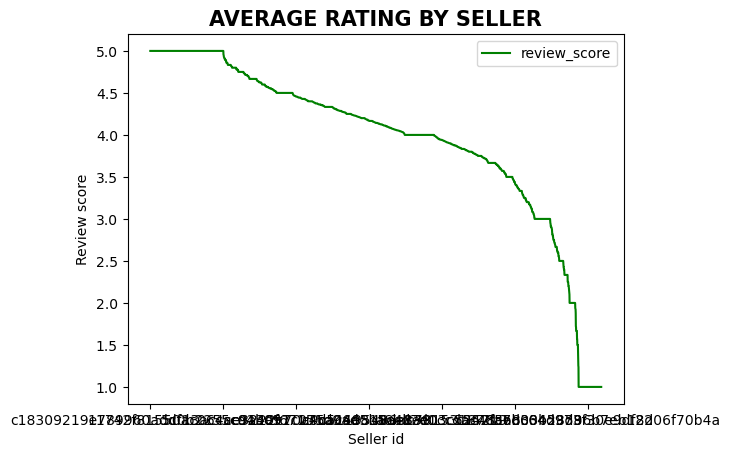

In [122]:
plt.figure(figsize=(13,7))
Avg_sell.plot(kind='line', x= 'seller_id', y='review_score', color='green')
plt.xlabel('Seller id', fontsize=10)
plt.ylabel("Review score", fontsize=10)
plt.title('AVERAGE RATING BY SELLER', fontsize=15, fontweight='bold')
plt.show()

In [123]:
Avg_loc=df.groupby(df.customer_state).review_score.mean().reset_index()
Avg_loc

,customer_state,review_score
0,Andhra Pradesh,3.979202
1,Arunachal Pradesh,4.008289
2,Chhattisgarh,4.015845
3,Delhi,4.018500
4,Goa,4.800000
5,Gujarat,4.023946
6,Haryana,4.085757
7,Himachal Pradesh,3.974713
8,Jammu & Kashmir,3.998907
9,Karnataka,3.996059


<Figure size 1300x700 with 0 Axes>

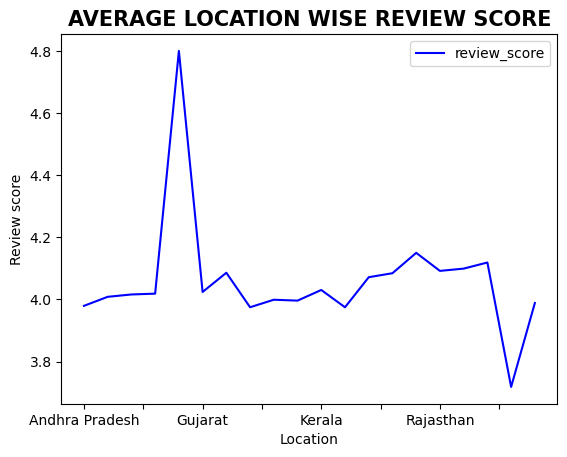

In [124]:
plt.figure(figsize=(13,7))
Avg_loc.plot(kind='line', x= 'customer_state', y='review_score', color='blue')
plt.xlabel('Location', fontsize=10)
plt.ylabel("Review score", fontsize=10)
plt.title('AVERAGE LOCATION WISE REVIEW SCORE', fontsize=15, fontweight='bold')
plt.show()

In [125]:
Avg_mon_rev=df.groupby(df.month_of_year).review_score.mean().reset_index()
Avg_mon_rev

,month_of_year,review_score
0,2016-09,1.000000
1,2016-10,3.491272
2,2016-12,5.000000
3,2017-01,4.063107
4,2017-02,3.980495
5,2017-03,4.018909
6,2017-04,3.956659
7,2017-05,4.096637
8,2017-06,4.101408
9,2017-07,4.081608


<Figure size 1300x700 with 0 Axes>

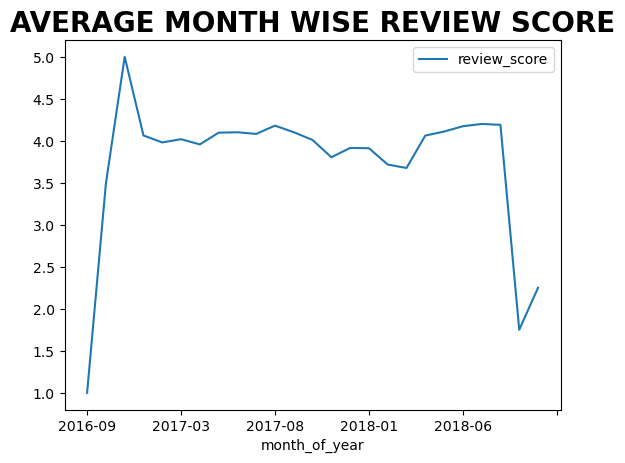

In [126]:
plt.figure(figsize=(13,7))
Avg_mon_rev.plot(kind='line', x='month_of_year', y='review_score')
plt.title('AVERAGE MONTH WISE REVIEW SCORE', fontsize=20, fontweight='bold')
plt.show()

In [127]:
df = pd.merge(left=cust_ord_rev_pay_item_prod_sell, right = geo_location, left_on = 'customer_zip_code_prefix',
              right_on = 'geolocation_zip_code_prefix', how = 'left')

In [128]:
Avg_prod_rat=df.groupby(df.product_id).review_score.mean().sort_values(ascending=False).reset_index()
Avg_prod_rat

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,86743ff92eee3d16b7df59cddd583b8c,5.0
2,868ceb027ab706a4dee42e2220006b85,5.0
3,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
4,868766ed2172644fdd977d6bd395a107,5.0
...,...,...
32946,94f8c822a2c9d476088ac45227f8226c,1.0
32947,69428fb5c0da1fac708bdb33868b42d8,1.0
32948,693e8a3550dfe12cd2a3f2a3f01b6130,1.0
32949,e15f2eb4bd9c94996e56cc76c1394361,1.0


<Figure size 1300x700 with 0 Axes>

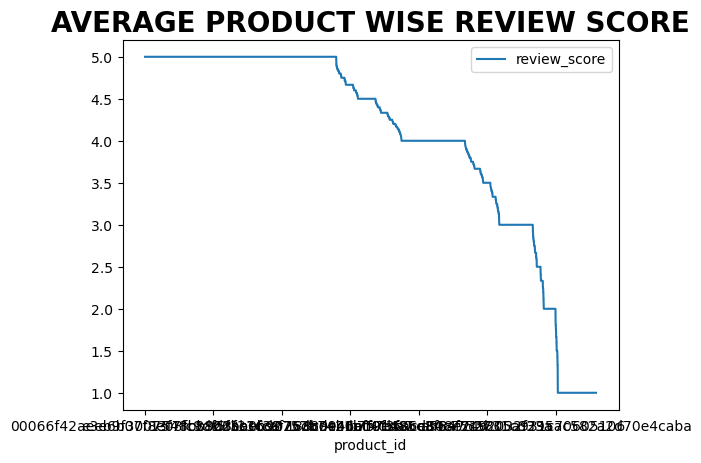

In [129]:
plt.figure(figsize=(13,7))
Avg_prod_rat.plot(kind='line', x='product_id', y='review_score')
plt.title('AVERAGE PRODUCT WISE REVIEW SCORE', fontsize=20, fontweight='bold')
plt.show()

In [130]:
Avg_cust_rat=df.groupby(df.customer_id).review_score.mean().sort_values(ascending=False).reset_index()
Avg_cust_rat

,customer_id,review_score
0,ffffe8b65bbe3087b653a978c870db99,5.0
1,7bd425c3c361c9e83b81f32dcd2f34eb,5.0
2,7be913d53481da4195609f9dc1ea373d,5.0
3,7bea077aae57157afa56bacc3852f1f7,5.0
4,dd14869d16243404d0aec5b90e588634,5.0
...,...,...
99436,aace4bee47eecb6e46bf3c316a19813c,1.0
99437,5dd777a48c8124ad7284bf0ae14057e9,1.0
99438,5dc6f4b9453584208557163c26079be1,1.0
99439,e5894d67ab3b433aa6219918e970baa0,1.0


<Figure size 1300x700 with 0 Axes>

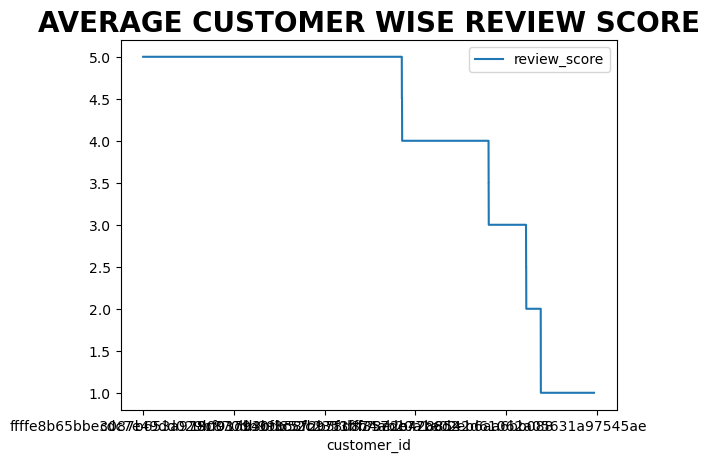

In [131]:
plt.figure(figsize=(13,7))
Avg_cust_rat.plot(kind='line', x='customer_id', y='review_score')
plt.title('AVERAGE CUSTOMER WISE REVIEW SCORE', fontsize=20, fontweight='bold')
plt.show()